In [2]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import coint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLV', 'XLY', 'XLU', 'XLRE', 'XLC']

prices = yf.download(tickers, start = '2010-01-01', end = '2020-12-31')['Close']

prices.dropna(inplace=True)
returns = prices.pct_change().dropna()

scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns.T)

returns_scaled



/var/folders/jt/p45yfdkx2nqcxbdvxb2j149w0000gn/T/ipykernel_69549/2099229847.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start = '2010-01-01', end = '2020-12-31')['Close']
[*********************100%***********************]  11 of 11 completed


array([[-1.34178578, -0.74871946,  1.2738032 , ..., -1.39262135,
         0.09667509,  1.51369052],
       [ 2.00935458, -0.09717063, -0.16525982, ...,  1.87532079,
         0.53042228, -1.79193093],
       [ 0.29838652, -1.88842726,  2.03493589, ..., -1.7488951 ,
        -1.1264339 ,  1.8209753 ],
       ...,
       [-0.47599217,  1.27854109,  0.19753627, ..., -0.14904408,
         0.74125416,  0.1022041 ],
       [-0.19263341, -0.04408015, -0.14857535, ..., -0.43281972,
         2.16458497, -0.74156221],
       [ 0.36817547, -0.24092862, -1.02414738, ...,  0.8953483 ,
         0.87938516,  0.25848287]])

In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(returns_scaled)

labels

array([0, 2, 0, 0, 0, 2, 1, 1, 1, 0, 2], dtype=int32)

In [4]:
cluster_df = pd.DataFrame({
    'Ticker': returns.columns,
    'Cluster': labels
}).sort_values(by='Cluster')

cluster_df

,Ticker,Cluster
0,XLB,0
2,XLE,0
3,XLF,0
4,XLI,0
9,XLV,0
6,XLP,1
7,XLRE,1
8,XLU,1
1,XLC,2
5,XLK,2


/var/folders/jt/p45yfdkx2nqcxbdvxb2j149w0000gn/T/ipykernel_69549/1273719951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=cluster_df, palette='Set2')


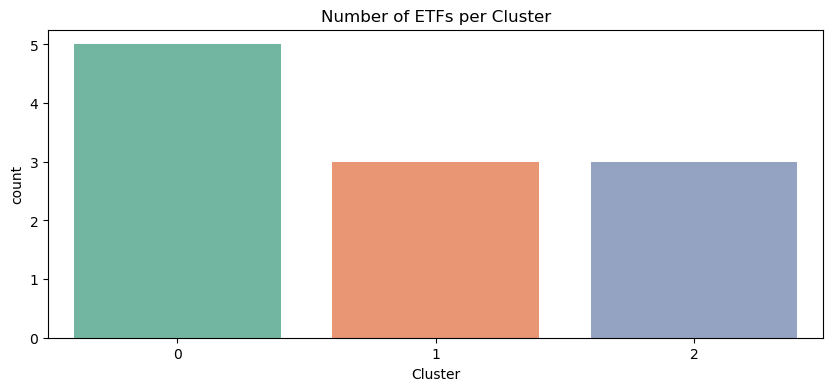

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.countplot(x='Cluster', data=cluster_df, palette='Set2')
plt.title('Number of ETFs per Cluster')
plt.show()
